# Prediksi Maintenance

Kelompok 3:
- Jessica Anne - 2272031
- Rafael Cavin Emmanuel Tuasuun - 2272041
- Selin Velday Papilaya - 2272048

Tujuan analisis ini adalah untuk mengetahui lab mana saja yang butuh maintenance selama 30 hari dan 180 hari depan, serta perkiraan jam maintenance yang dibutuhkan sehingga Kepala Staff Lab GWM Lt. 8 dapat melakukan langkah strategis untuk menghindari kasus kerusakan komponen lab dengan mengalokasikan anggota tim staff. 



Hal pertama yang kami lakukan adalah prepocessing data, kami mulai dengan mengakses file dataset yang sudah kami kumpulkan, kemudian menampilkan beberapa baris untuk memberikan sedikit pemahaman tentang struktur dan juga konten dari dataset.

In [1]:
import pandas as pd

file_path = 'Dataset Maintenance.xlsx'
df = pd.read_excel(file_path)

df.head()

,Timestamp,Email Address,NRP - Nama,Tanggal,Jam Masuk,Jam Selesai,Total Jam,Lab yang dilakukan maintenance,Kegiatan yang dilakukan
0,2021-11-27 01:14:05.654,2072001@maranatha.ac.id,2072001 - Matthew Julian,2021-11-19,10:00:00,17:00:00,07:00:00,All,pengambilan dan pemasangan alat hybrid untuk s...
1,2021-11-27 09:15:24.546,2072008@maranatha.ac.id,2072008 - Nicholas Christel Hanafi,2021-11-19,11:00:00,17:00:00,06:00:00,All,Rakit Bracket dan TV untuk Hybrid.
2,2021-12-01 14:24:24.823,1873001@maranatha.ac.id,1873001 - Kristanto Tanuwidjaja,2021-11-19,10:00:00,17:00:00,07:00:00,All,"Ambil TV, Stand Bracket, dll untuk keperluan h..."
3,2021-12-02 07:54:12.895,1873006@maranatha.ac.id,1873006 - Sienie Celicia Dewi,2021-11-19,10:00:00,17:00:00,07:00:00,All,"Checking barang persiapan hybrid yang datang, ..."
4,2021-12-02 16:37:54.315,1873032@maranatha.ac.id,1873032 - Theresia Antonia Widiastuti,2021-11-19,10:00:00,17:00:00,07:00:00,All,"rekap kelengkapan barang dari vendor, menyiapk..."


Data pada file Excel tidak sepenuhnya siap untuk digunakan sebagai dataset. Data yang masih dalam bentuk timestamp perlu kita ubah menjadi data numerik biasa agar dapat dipelajari dan ditest.

In [2]:
from datetime import datetime, date, timedelta
import numpy as np

def convertKeJam(waktu_mulai, waktu_selesai):
    waktu_mulai_str = str(waktu_mulai)
    waktu_selesai_str = str(waktu_selesai)

    waktu_mulai_dt = datetime.strptime(waktu_mulai_str, '%H:%M:%S').time()
    waktu_selesai_dt = datetime.strptime(waktu_selesai_str, '%H:%M:%S').time()
    
    total_jam = (datetime.combine(date.min, waktu_selesai_dt) - datetime.combine(date.min, waktu_mulai_dt))
    return total_jam.total_seconds() / 3600
    
df['Total Jam'] = df.apply(lambda row: convertKeJam(row['Jam Masuk'], row['Jam Selesai']), axis=1)
df['Total Jam'] = np.floor(df['Total Jam']).astype(int)

Selain TypeError yang diperbaiki dengan mengubah bentuk timestamp menjadi numerik, kolom lab masih dalam bentuk kategorikal. Data pada kolom tersebut perlu diubah terlebih dahulu. Pada kasus ini, kami menggunakan label encoder. Kami juga menambahkan fitur baru pada dataset yaitu Day of Year karena tanggal juga dapat menjadi faktor dari jumlah jam maintenance.

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Lab'] = label_encoder.fit_transform(df['Lab yang dilakukan maintenance'])

df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Day of Year'] = df['Tanggal'].dt.dayofyear

df

,Timestamp,Email Address,NRP - Nama,Tanggal,Jam Masuk,Jam Selesai,Total Jam,Lab yang dilakukan maintenance,Kegiatan yang dilakukan,Lab,Day of Year
0,2021-11-27 01:14:05.654,2072001@maranatha.ac.id,2072001 - Matthew Julian,2021-11-19,10:00:00,17:00:00,7,All,pengambilan dan pemasangan alat hybrid untuk s...,83,323
1,2021-11-27 09:15:24.546,2072008@maranatha.ac.id,2072008 - Nicholas Christel Hanafi,2021-11-19,11:00:00,17:00:00,6,All,Rakit Bracket dan TV untuk Hybrid.,83,323
2,2021-12-01 14:24:24.823,1873001@maranatha.ac.id,1873001 - Kristanto Tanuwidjaja,2021-11-19,10:00:00,17:00:00,7,All,"Ambil TV, Stand Bracket, dll untuk keperluan h...",83,323
3,2021-12-02 07:54:12.895,1873006@maranatha.ac.id,1873006 - Sienie Celicia Dewi,2021-11-19,10:00:00,17:00:00,7,All,"Checking barang persiapan hybrid yang datang, ...",83,323
4,2021-12-02 16:37:54.315,1873032@maranatha.ac.id,1873032 - Theresia Antonia Widiastuti,2021-11-19,10:00:00,17:00:00,7,All,"rekap kelengkapan barang dari vendor, menyiapk...",83,323
...,...,...,...,...,...,...,...,...,...,...,...
913,2024-05-27 17:30:31.056,2273016@maranatha.ac.id,2273016 Valentina Devi R,2024-05-27,15:20:00,17:30:00,2,MMD,"check all pc ( keyboard, mouse, pc, proyektor)",130,148
914,2024-05-27 17:31:16.155,2272041@maranatha.ac.id,2272041 Rafael Cavin Emmanuel Tuasuun,2024-05-27,12:20:00,17:20:00,5,"INT 1, MMD","cek all pc (keyboard, mouse, etc.), cek proyek...",115,148
915,2024-05-29 20:59:35.289,2272041@maranatha.ac.id,2272041 Rafael Cavin Emmanuel Tuasuun,2024-05-29,11:00:00,16:00:00,5,"ADV 1, NET","Fix problem PC net 9 dan net 31, update driver...",36,150
916,2024-05-30 20:57:35.719,2272041@maranatha.ac.id,2272041 Rafael Cavin Emmanuel Tuasuun,2024-05-30,12:00:00,15:00:00,3,NET,Update driver all pc NET,134,151


Setelah itu, kami memilih kolom-kolom yang relevan saja untuk dijadikan sebagai fitur dalam dataset. Dalam kasus ini, kami membuang kolom Timestamp, Email, NRP-Nama, dan juga kegiatan yang dilakukan. Untuk memastikan tipe data sudah tidak ada yang timestamp atau float, maka kami juga menampilkan tipe data setiap kolom.

In [4]:
df = df[['Tanggal','Day of Year', 'Lab', 'Total Jam']]
df.dtypes

Tanggal        datetime64[ns]
Day of Year             int32
Lab                     int32
Total Jam               int32
dtype: object

In [40]:
if df.select_dtypes(include=['object']).any().any():
    print("Tidak ada yang perlu diubah menjadi data numerik")
    for column in df.select_dtypes(include=['object']):
        print(f"Mengubah {column} menjadi numerik")
        try:
            df[column] = df[column].astype(float)
        except ValueError:
            df[column] = label_encoder.fit_transform(df[column])

Agar model yang akan kami buat dapat memiliki evaluasi yang komprehensif, kami akan melakukan Grid Search untuk mengetahui parameter terbaik yang akan digunakan pada model dan juga cross validation dengan fold sebanyak 5

In [6]:
from sklearn.model_selection import train_test_split
X = df[['Day of Year', 'Lab']]
y = df['Total Jam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X

,Day of Year,Lab
0,323,83
1,323,83
2,323,83
3,323,83
4,323,83
...,...,...
913,148,130
914,148,115
915,150,36
916,151,134


In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

Grid Search

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [10]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(best_params)
best_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

best_model.fit(X_train, y_train)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 2.23
Mean Absolute Error (MAE): 1.09
R-squared (R2): 0.14


Pembentukan model dengan best hyperparameter, sudah selesai. Sekarang, program akan dilanjutkan dengan membuat prediksi untuk 30 hari ke depan dan 180 hari ke depan.

Kami membuat prediksi untuk yang 30 hari terlebih dahulu. Caranya adalah kami mengambil tanggal maksimum dari dataset, kami tidak mengambil dari kolom "Day of Year" karena data yang ada pada kolom tersebut tidak mengandung tahun sehingga bisa saja yang diambil lebih awal dari tahun 2024. 

Kemudian tanggal tersebut ditambahkan dengan 30 dan setelah itu data tersebut diubah kembali menjadi data numerik dan dimasukkan ke dalam kolom "Day of Year". Setelah mendapatkan data untuk kolom "Day of Year", dataframe baru dibuat untuk melakukan prediksi.

In [28]:
# Tanggal terakhir yang ada di dataset
tanggal_terakhir = df['Tanggal'].max()

# Membuat tanggal untuk 30 hari ke depan
tanggal_prediksi_30 = [tanggal_terakhir + timedelta(days=i) for i in range(1, 31)]
day_of_year_prediksi_30 = [tanggal.dayofyear for tanggal in tanggal_prediksi_30]

lab_ids = df['Lab'].unique()

df_prediksi_total = pd.DataFrame()

# Prediksi untuk setiap lab selama 30 hari ke depan
for lab in lab_ids:
    df_prediksi_30 = pd.DataFrame({
        'Day of Year': day_of_year_prediksi_30,
        'Lab': [lab] * len(day_of_year_prediksi_30)
    })
    df_prediksi_30['Total Jam Prediksi'] = best_model.predict(df_prediksi_30)
    df_prediksi_30['Tanggal'] = tanggal_prediksi_30
    df_prediksi_30['Lab'] = lab
    df_prediksi_total = pd.concat([df_prediksi_total, df_prediksi_30])

In [29]:
tanggal_prediksi_180 = [tanggal_terakhir + timedelta(days=i) for i in range(1, 181)]
day_of_year_prediksi_180 = [tanggal.dayofyear for tanggal in tanggal_prediksi_180]

lab_ids = df['Lab'].unique()

df_prediksi_total_180 = pd.DataFrame()

for lab in lab_ids:
    df_prediksi_180 = pd.DataFrame({
        'Day of Year': day_of_year_prediksi_180,
        'Lab': [lab] * len(day_of_year_prediksi_180)
    })
    df_prediksi_180['Total Jam Prediksi'] = best_model.predict(df_prediksi_180)
    df_prediksi_180['Tanggal'] = tanggal_prediksi_180
    df_prediksi_180['Lab'] = lab
    df_prediksi_total_180 = pd.concat([df_prediksi_total_180, df_prediksi_180])

#### Prediksi berhasil dilakukan, rasanya kurang apabila datanya tidak divisualisasikan. Kami membuat visualisasi dengan scatter plot.

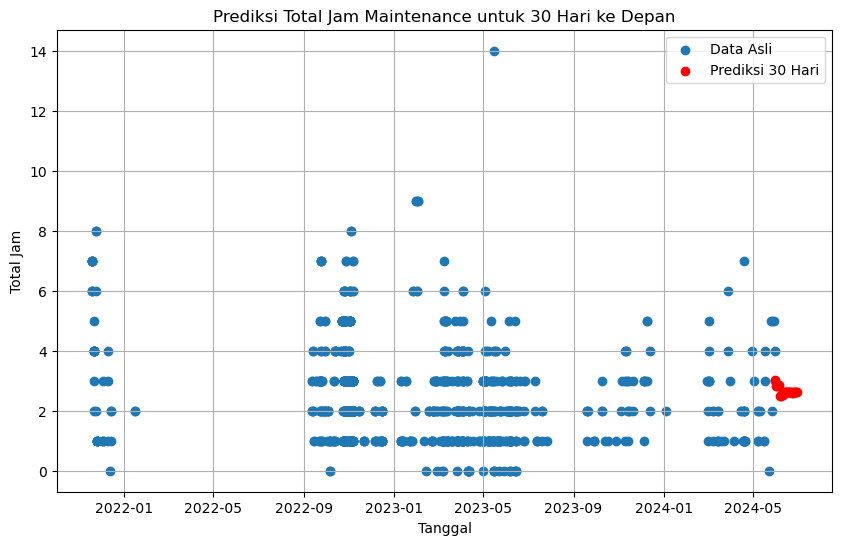

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Tanggal'], df['Total Jam'], label='Data Asli')
plt.scatter(df_prediksi_30['Tanggal'], df_prediksi_30['Total Jam Prediksi'], color='red', label='Prediksi 30 Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Jam')
plt.title('Prediksi Total Jam Maintenance untuk 30 Hari ke Depan')
plt.legend()
plt.grid(True)
plt.show()


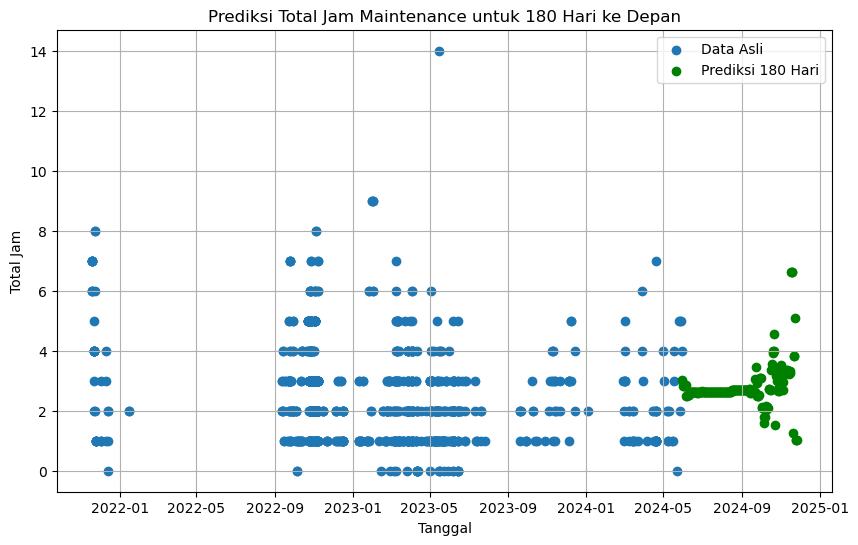

In [37]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Tanggal'], df['Total Jam'], label='Data Asli')
plt.scatter(df_prediksi_180['Tanggal'], df_prediksi_180['Total Jam Prediksi'], color='green', label='Prediksi 180 Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Jam')
plt.title('Prediksi Total Jam Maintenance untuk 180 Hari ke Depan')
plt.legend()
plt.grid(True)
plt.show()

Untuk mengetahui lab mana yang paling butuh maintenance di bulan berikutnya, kita perlu mengetahui total jam per labnya selama 30 hari ke depan.

In [45]:
# Akumulasi hasil prediksi per lab selama 30 hari
total_jam_per_lab_30 = df_prediksi_total.groupby('Lab')['Total Jam Prediksi'].sum().reset_index()

# Menentukan lab dengan kebutuhan maintenance tertinggi selama 30 hari
lab_butuh_maintenance_30 = total_jam_per_lab_30.loc[total_jam_per_lab_30['Total Jam Prediksi'].idxmax()]
print(f"Lab yang membutuhkan maintenance terbanyak selama 30 hari ke depan: {label_encoder.inverse_transform([int(lab_butuh_maintenance_30['Lab'])])[0]} dengan total jam prediksi: {lab_butuh_maintenance_30['Total Jam Prediksi']:.2f}")

Lab yang membutuhkan maintenance terbanyak selama 30 hari ke depan: INT 1, Prog 1, Prog 2 dengan total jam prediksi: 99.48


In [42]:
# Akumulasi hasil prediksi per lab selama 180 hari
total_jam_per_lab_180 = df_prediksi_total_180.groupby('Lab')['Total Jam Prediksi'].sum().reset_index()

# Menentukan lab dengan kebutuhan maintenance tertinggi selama 180 hari
lab_butuh_maintenance_180 = total_jam_per_lab_180.loc[total_jam_per_lab_180['Total Jam Prediksi'].idxmax()]
print(f"Lab yang membutuhkan maintenance terbanyak selama 180 hari ke depan: {label_encoder.inverse_transform([int(lab_butuh_maintenance_180['Lab'])])[0]} dengan total jam prediksi: {lab_butuh_maintenance_180['Total Jam Prediksi']:.2f}")

Lab yang membutuhkan maintenance terbanyak selama 180 hari ke depan: INT 1, Prog 1, Prog 2 dengan total jam prediksi: 594.89


### Dengan demikian, kita dapat mengetahui lab mana saja yang perlu maintenance selama 1 bulan dan 1 semester ke depan dan perkiraan jam maintenancenya. 

#### Informasi ini dapat dijadikan warning atau referensi alokasi pembetukan anggota tim staff lab.